#  EDA ON THE HABERMAN'S BREAST CANCER SURVIVAL DATA

# EXPLORATORY DATA ANALYSIS

Exploratory data analysis (EDA) can be understood by taking a example of :
  Let's say we heard about this game of football for android as one of the best games by your friends, and they are asking you to install it and try it out, but the thing here is you don't know much about football and specially about this game and as this game is big in space so, you decide to clear some of your doubts like ( reviews, exploring the game, trailer etc.) and after clearing your doubts you make some assumptions about the game and start to think hypothetically that to test it and try to understand the game.
  
  Just like the example, working with the data about which we do not know anything and then using EDA on the data by which we find the relation between the labels, we get to know more about the data what the data is wanting to tell you and after that testing it and making the suitable assumptions. 

# 1] DATA SET INFORMATION
   The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

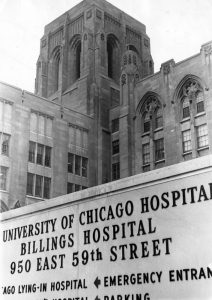

INFORMATION ABOUT VARIABLES :

  1]  Age of patient
  
  2]  Operation year of patient
  
  3]  Auxillary nodes ( Auxillary nodes are those by which breast cancer frequently spreads)
  
  4]  Survival status (1 for patient survived and 2 for patient did not survive)
  
  Objectives will help us while the analysis, by using these we can predict whether the patient survives (1) or not on the based upon the patient's age, patient's year of operation, patient's nodes by which the cancer spreads.

# 2] IMPORTING THE REQUIRED PACKAGES

In [1]:
#IMPORTING
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#IMPORTING THE DATASET 
data = pd.read_csv('Haberman.csv')
print(data.head())

   Age  Operation_Year  Auxillary_Nodes  Survival_Status
0   30              64                1                1
1   30              62                3                1
2   30              65                0                1
3   31              59                2                1
4   31              65                4                1


# 3] DATA PREPARATION

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                306 non-null int64
Operation_Year     306 non-null int64
Auxillary_Nodes    306 non-null int64
Survival_Status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


OBSERVATIONS :

  1] There are no missing values.
  
  2] The survival status which is our output variable indicates, 1 = patient survived and 2 = patient did not survive
  
  3] There are 3 input variables which are patient's information like (Age, Operation Year, Auxillary Nodes)
  
  4] There are 306 patient's information.
  
  5] All the values are in integer datatype.

In [4]:
data['Survival_Status'].value_counts() 

1    225
2     81
Name: Survival_Status, dtype: int64

In [5]:
data['Survival_Status'] = data['Survival_Status'].map({1 : 1, 2 : 0})
print(data.head())

   Age  Operation_Year  Auxillary_Nodes  Survival_Status
0   30              64                1                1
1   30              62                3                1
2   30              65                0                1
3   31              59                2                1
4   31              65                4                1


In [6]:
print(list(data['Survival_Status'].unique()))

[1, 0]


* I was getting confused between 1 and 2 so, I changed 2 to 0.

* Now, you can see 1 is for survived and 0 is for Not survived.

# 4] 2-D SCATTER PLOT

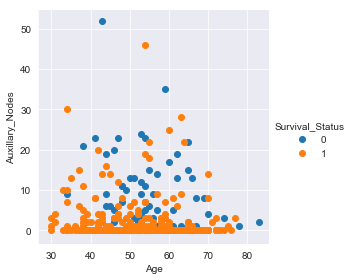

In [7]:
# 2-D Scatter plot with color-coding for Survival_Status
sns.set_style('darkgrid')

# FacetGrid = It maps dataset onto multiple axes.
sns.FacetGrid(data, hue = 'Survival_Status', height = 4)\
   .map(plt.scatter, 'Age', 'Auxillary_Nodes')\
   .add_legend()
plt.show()

OBSERVATION(S) :

  1] Separating them is much harder as they are overlapping.

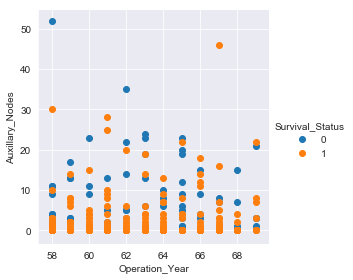

In [8]:
plt.close()
sns.FacetGrid(data, hue = 'Survival_Status', height = 4)\
   .map(plt.scatter, 'Operation_Year', 'Auxillary_Nodes')\
   .add_legend()
plt.show()

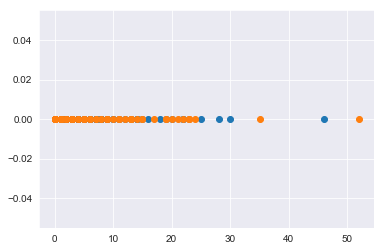

In [9]:
import numpy as np
Survived = data.loc[data['Survival_Status'] == 1]
Not_Survived = data.loc[data['Survival_Status'] == 0]

plt.plot(Survived['Auxillary_Nodes'], np.zeros_like(Survived['Auxillary_Nodes']), 'o')
plt.plot(Not_Survived['Auxillary_Nodes'], np.zeros_like(Not_Survived['Auxillary_Nodes']), 'o')

plt.show()

* 1-D scatter plot is very hard to make any sense
* By looking at the plot we can say it is overlapping a lot.

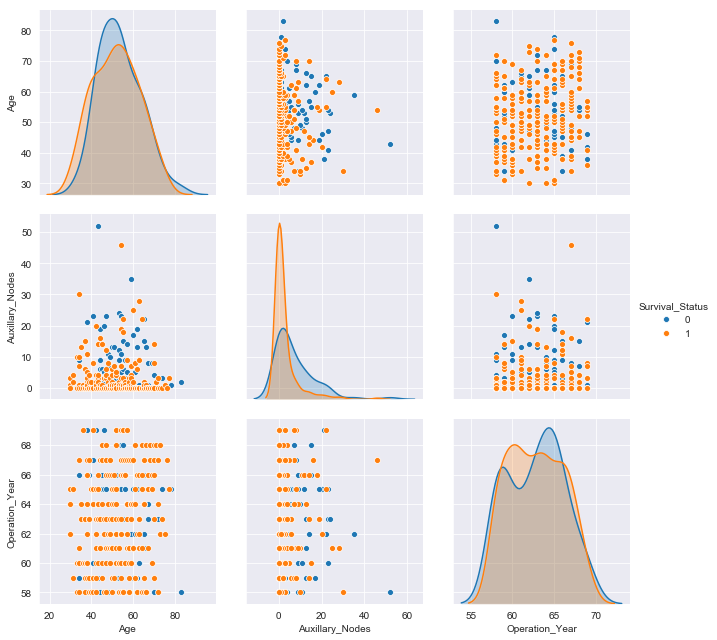

In [10]:
plt.close()
sns.set_style('darkgrid')
sns.pairplot(data, height = 3, hue = 'Survival_Status', vars = ['Age', 'Auxillary_Nodes', 'Operation_Year'])
plt.show()

# 5] HISTOGRAMS, PDF, CDF

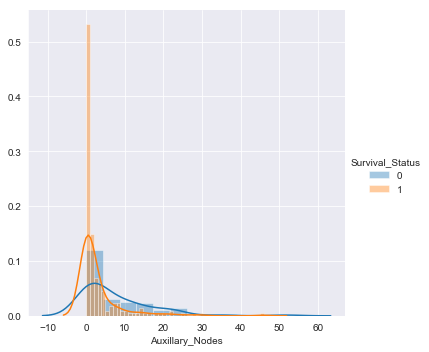

In [11]:
sns.FacetGrid(data, hue = 'Survival_Status', height = 5)\
   .map(sns.distplot, 'Auxillary_Nodes')\
   .add_legend()
plt.show()

* By looking at the height  we can say that, the number of Patient who had 0 Auxillary node had the highest chance of surviving. 
* The small mountain type shape is the PDF (smoothed histogram), it basically says that how much points you will find in that particular region.
* Here we can see the patients having Auxillary nodes more than 52 (A.N > 50), they did not survive.

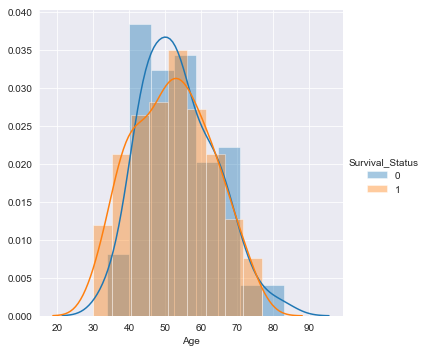

In [12]:
sns.FacetGrid(data, hue = 'Survival_Status', height = 5)\
   .map(sns.distplot, 'Age')\
   .add_legend()
plt.show()

* From this we can understand that, patient above age 78 doesn't survives.

   (From 2 previous graphs we reach to, if A.N > 50 and Age > 78(These patients did not survive.))

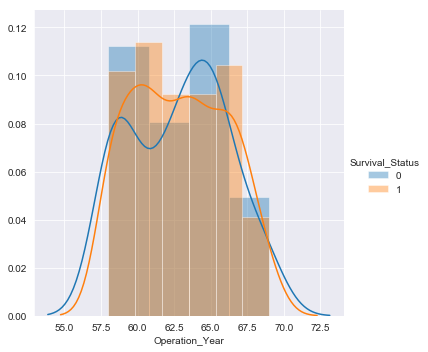

In [13]:
sns.FacetGrid(data, hue = 'Survival_Status', height = 5)\
   .map(sns.distplot, 'Operation_Year')\
   .add_legend()
plt.show()

* We can not decide anything looking at the Operation year variable since there is so much overlapping.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


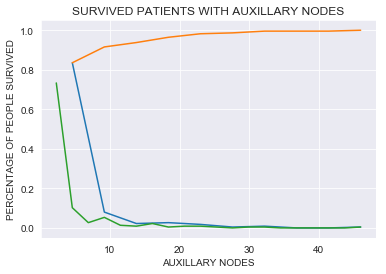

In [14]:

counts, bin_edges = np.histogram(Survived['Auxillary_Nodes'], density = True, bins = 10)
                      

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.close()
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(Survived['Auxillary_Nodes'], density = True, bins = 20)

pdf = counts/(sum(counts))


plt.plot(bin_edges[1:], pdf)
plt.title('SURVIVED PATIENTS WITH AUXILLARY NODES')
plt.xlabel('AUXILLARY NODES')
plt.ylabel('PERCENTAGE OF PEOPLE SURVIVED')
plt.show()

Survived with AUxillary nodes
* Here, patients with less Auxillary nodes (>=5) have somewhat 80 or 82% of survive rate.
* 100 % patient who survived has Auxillary nodes less than 50.
* 14 % patient have Auxillary nodes less than 10.


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


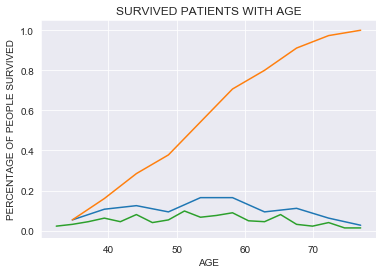

In [15]:
counts, bin_edges = np.histogram(Survived['Age'], density = True, bins = 10)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(Survived['Age'], density = True, bins = 20)

pdf = counts/(sum(counts))

plt.plot(bin_edges[1:], pdf)

plt.title('SURVIVED PATIENTS WITH AGE')
plt.xlabel('AGE')
plt.ylabel('PERCENTAGE OF PEOPLE SURVIVED')
plt.show()

* Patient with 52 to 58 age have 55 % chance of surviving.

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


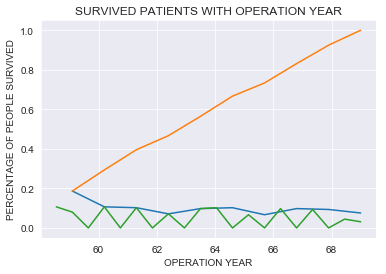

In [16]:
counts, bin_edges = np.histogram(Survived['Operation_Year'], density = True, bins = 10)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(Survived['Operation_Year'], density = True, bins = 20)

pdf = counts/(sum(counts))

plt.plot(bin_edges[1:], pdf)

plt.title('SURVIVED PATIENTS WITH OPERATION YEAR')
plt.xlabel('OPERATION YEAR')
plt.ylabel('PERCENTAGE OF PEOPLE SURVIVED')
plt.show()

* Operation carried out before 60, those patient have <20 % chance of surviving.

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


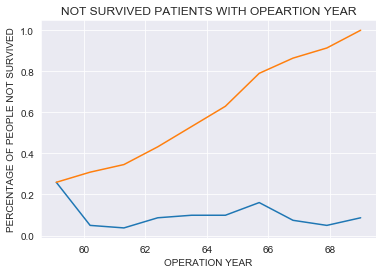

In [17]:
counts, bin_edges = np.histogram(Not_Survived['Operation_Year'], density = True, bins = 10)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('NOT SURVIVED PATIENTS WITH OPEARTION YEAR')
plt.xlabel('OPERATION YEAR')
plt.ylabel('PERCENTAGE OF PEOPLE NOT SURVIVED')
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


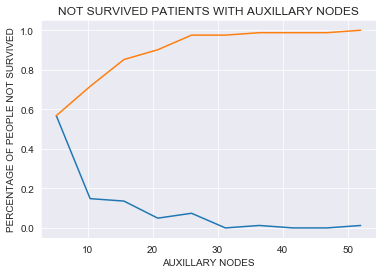

In [18]:
counts, bin_edges = np.histogram(Not_Survived['Auxillary_Nodes'], density = True, bins = 10)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('NOT SURVIVED PATIENTS WITH AUXILLARY NODES')
plt.xlabel('AUXILLARY NODES')
plt.ylabel('PERCENTAGE OF PEOPLE NOT SURVIVED')
plt.show()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


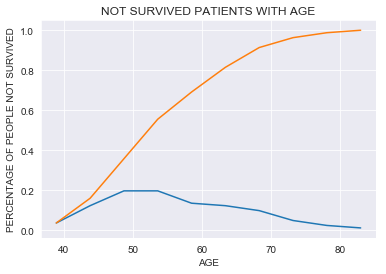

In [19]:
counts, bin_edges = np.histogram(Not_Survived['Age'], density = True, bins = 10)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('NOT SURVIVED PATIENTS WITH AGE')
plt.xlabel('AGE')
plt.ylabel('PERCENTAGE OF PEOPLE NOT SURVIVED')
plt.show()



# 6] MEAN, STANDARD DEVIATION, MEDIAN

In [20]:
print('SURVIVED PATIENTS WITH AUXILLARY NODES:')
print('Means:')
print(np.mean(Survived['Auxillary_Nodes']))

print(np.mean(np.append(Survived['Auxillary_Nodes'], 225))) # for the outliers, 225 are the Survived patient
print(np.mean(Not_Survived['Auxillary_Nodes']))

print('\nStd-dev:')
print(np.std(Survived['Auxillary_Nodes']))
print(np.std(Not_Survived['Auxillary_Nodes']))

print('\nSURVIVED PATIENTS WITH AGE:')
print('Means:')
print(np.mean(Survived['Age']))
print(np.mean(Not_Survived['Age']))

print('\nStd-dev:')
print(np.std(Survived['Age']))
print(np.std(Not_Survived['Age']))

print('\nSURVIVED PATIENTS WITH OPERATION YEAR:')
print('Means:')
print(np.mean(Survived['Operation_Year']))
print(np.mean(Not_Survived['Operation_Year']))

print('\nStd-dev:')
print(np.std(Survived['Operation_Year']))
print(np.std(Not_Survived['Operation_Year']))

SURVIVED PATIENTS WITH AUXILLARY NODES:
Means:
2.7911111111111113
3.774336283185841
7.45679012345679

Std-dev:
5.857258449412138
9.128776076761635

SURVIVED PATIENTS WITH AGE:
Means:
52.01777777777778
53.67901234567901

Std-dev:
10.987655475100508
10.104182193031312

SURVIVED PATIENTS WITH OPERATION YEAR:
Means:
62.86222222222222
62.82716049382716

Std-dev:
3.2157452144021947
3.3214236255207887


* As we can see here our STD is higher than the Mean so, that means our data is more spread out for Auxillary node.
* If the mean is higher than STD then it means, out data is clustered around the mean.

In [21]:
print('Median:')
print(np.median(Survived['Auxillary_Nodes']))

print(np.median(np.append(Survived['Auxillary_Nodes'], 225)))
print(np.median(Not_Survived['Auxillary_Nodes']))

print("\nQuantiles:")
print(np.percentile(Survived['Auxillary_Nodes'],np.arange(0, 100, 25)))
print(np.percentile(Not_Survived['Auxillary_Nodes'],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(Survived['Auxillary_Nodes'],90))
print(np.percentile(Not_Survived['Auxillary_Nodes'],90))

Median:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0


# 7] BOX-PLOTS AND WHISKERS

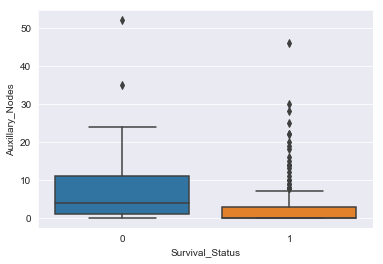

In [22]:
sns.boxplot(x = 'Survival_Status', y = 'Auxillary_Nodes', data = data)
plt.show()

#  8] VIOLIN PLOTS

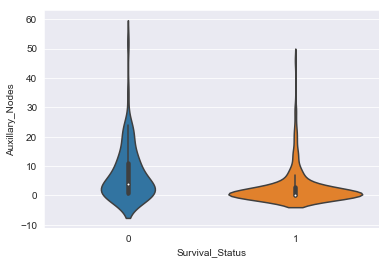

In [23]:
sns.violinplot(x = 'Survival_Status', y = 'Auxillary_Nodes', data = data, size = 8)
plt.show()

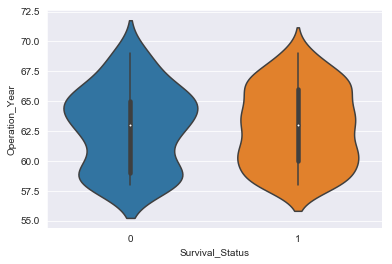

In [24]:
sns.violinplot(x = 'Survival_Status', y = 'Operation_Year', data = data, size = 8)
plt.show()

# CONCLUSION:
 * By plotting and scattering the data points, we can see that patient's(Operation_Year and Auxillary_Nodes) gives a better understanding and by using these two variables we can get some accurate results.
   